In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import os
from skimage import io
import pandas as pd
import sys
from sklearn.cross_validation import train_test_split
from time import time
from skimage.transform import resize, rotate
import pickle

In [15]:
test_images = os.listdir('./facial-keypoints-test/images/')
print len(test_images)

X_test = []
for test_image in test_images:
    X_test.append(io.imread('./facial-keypoints-test/images/' + test_image))

1763


In [3]:
train_images = pd.read_csv('./facial-keypoints-train/gt_train.csv')

print len(train_images)
X = []
for train_image in train_images.iterrows():
    X.append(io.imread('./facial-keypoints-train/images/' + train_image[1][0]))
    
X = np.array(X)
y = train_images[train_images.columns[1:]].as_matrix()[:X.shape[0]]

6000


In [4]:
def show_keypoints(img_range=X, keypoints_range=y, numb_to_show=10):
    for index in range(numb_to_show):
        imshow(img_range[index])
        axis('off')
        for i in range(0,28,2):
            scatter([keypoints_range[index][i]], [keypoints_range[index][i+1]], color='r')
        show()

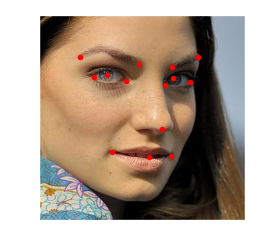

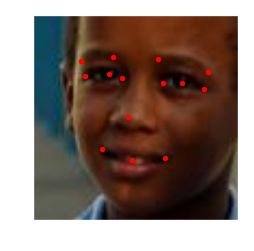

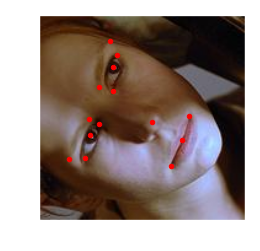

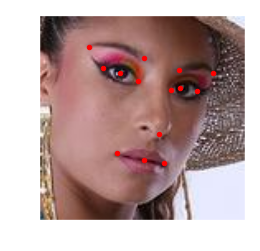

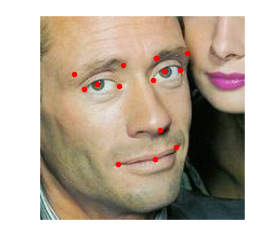

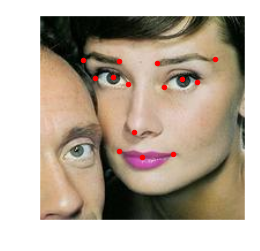

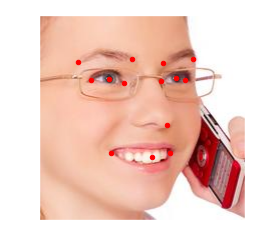

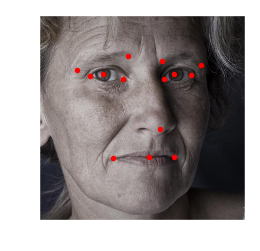

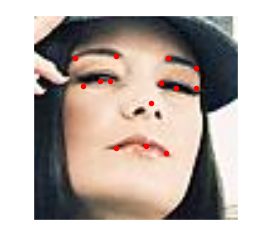

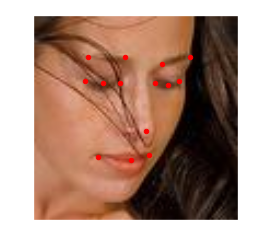

In [5]:
show_keypoints()

In [6]:
SHAPE = (100,100,3)
def resize_img(img, shape=SHAPE):
    return resize(img, shape)

def resize_keypoints(args, shape=SHAPE):
    keypoints, img = args
    old_shape = img.shape
    x_compression = shape[1] * 1. / img.shape[1]
    y_compression = shape[0] * 1. / img.shape[0]

    keypoints = keypoints.astype('float64')
    keypoints[::2] *=  x_compression
    keypoints[1::2] *= y_compression
    return keypoints

In [6]:
X_test = map(resize_img, X_test)

In [7]:
X_test = np.array(X_test)

In [11]:
MEAN_VALUES = np.load('./train_batches__100_2/mean_val_all.npy')

In [13]:
MEAN_STD_TRAIN = np.load('./train_batches__100_2/mean_val_train.npy')
MEAN_STD = 0.23 * MEAN_STD_TRAIN + 0.77 * MEAN_STD_TEST

In [14]:
np.save('./train_batches__100_2/mean_std_all', MEAN_STD)

In [7]:
def reverse_img(img, keypoints):
    new_img = img[:, ::-1, :].copy()
    new_keypoints = keypoints.copy()
    new_keypoints[::2] = SHAPE[1] - new_keypoints[::2]
    return new_img, new_keypoints

In [8]:
MEAN_VAL_STD = np.load('./train_batches__100_2/mean_std_all.npy')
MEAN_VAL = np.load('./train_batches__100_2/mean_val_all.npy')

def preprocess(img):
    img = img.astype(np.float)
    img = (img - MEAN_VAL) / MEAN_VAL_STD
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]   
    return np.array([r, g, b])

def deprocess(img, shape=(100,100,3)):
    img = img.copy()
    r, g, b = img[0], img[1], img[2]
    img = np.zeros(shape)
    img[:, :, 0], img[:, :, 1], img[:, :, 2] = r, g, b
    img = img * MEAN_VAL_STD + MEAN_VAL
    return img

In [9]:
def rotate_img(img, keypoints):
    angle = choice(range(-40, 45, 5))
    if img.shape[-1] == 3:
        rows, cols = img.shape[:-1]
    else:
        rows, cols = img.shape[1:]

    center = np.array([rows / 2 - 0.5, cols / 2 - 0.5])
    new_img = rotate(img, angle, mode='edge')
    angle_rad = np.deg2rad(angle)
    angle_matrix = np.matrix([[np.cos(angle_rad), np.sin(angle_rad)], [-np.sin(angle_rad), np.cos(angle_rad)]])
    new_keypoints = np.zeros(28)
    for i in range(0,28,2):
        new_keypoints[[i, i+1]] = keypoints[[i,i+1]] - center
        new_keypoints[[i, i+1]] = angle_matrix * new_keypoints[[i, i+1]].reshape((2,1))
        new_keypoints[[i, i+1]] = new_keypoints[[i,i+1]] + center
    
    new_keypoints = new_keypoints.astype('int32')
    return new_img, new_keypoints

MEAN_VALUES array([ 136.96777818,  110.54632232,   96.41088777])

In [17]:
perm = np.random.permutation(range(len(X)))
X, y = X[perm], y[perm]

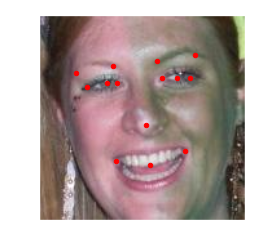

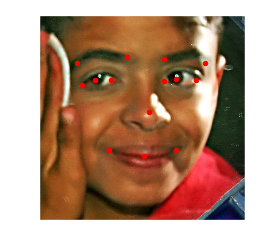

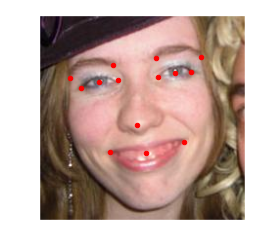

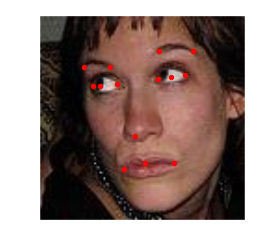

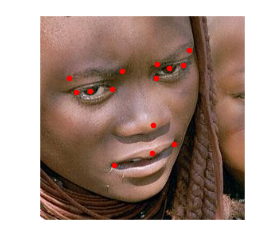

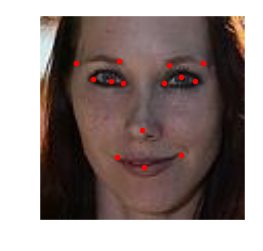

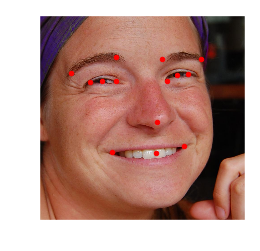

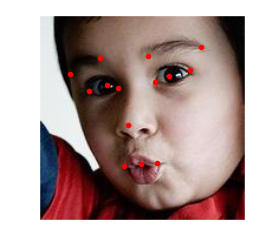

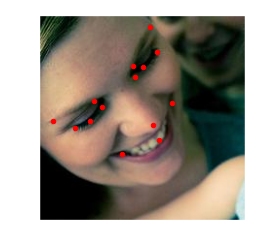

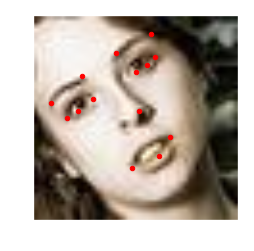

In [18]:
show_keypoints(X, y)

In [19]:
batch_size = 70
for i in range(0, len(X), batch_size):
    print "batch number {} out of {}".format(i/batch_size, len(X)/batch_size)
    X_batch = map(resize_img, X[i: i + batch_size])
    y_batch = map(resize_keypoints, zip(y[i: i + batch_size], X[i: i + batch_size]))
    
    for j in range(0, batch_size):
        img, keyp = rotate_img(X_batch[j], y_batch[j])
        X_batch.append(img)
        y_batch.append(keyp)
        
    for j in range(0, batch_size):
        img, keyp = reverse_img(X_batch[j], y_batch[j])
        X_batch.append(img)
        y_batch.append(keyp)
    
    X_batch = np.array(map(preprocess, X_batch))
    np.save('./train_batches__100_4/batchX_{}'.format(i/batch_size), X_batch)
    np.save('./train_batches__100_4/batchy_{}'.format(i/batch_size), y_batch)

batch number 0 out of 85


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


batch number 1 out of 85
batch number 2 out of 85
batch number 3 out of 85
batch number 4 out of 85
batch number 5 out of 85
batch number 6 out of 85
batch number 7 out of 85
batch number 8 out of 85
batch number 9 out of 85
batch number 10 out of 85
batch number 11 out of 85
batch number 12 out of 85
batch number 13 out of 85
batch number 14 out of 85
batch number 15 out of 85
batch number 16 out of 85
batch number 17 out of 85
batch number 18 out of 85
batch number 19 out of 85
batch number 20 out of 85
batch number 21 out of 85
batch number 22 out of 85
batch number 23 out of 85
batch number 24 out of 85
batch number 25 out of 85
batch number 26 out of 85
batch number 27 out of 85
batch number 28 out of 85
batch number 29 out of 85
batch number 30 out of 85
batch number 31 out of 85
batch number 32 out of 85
batch number 33 out of 85
batch number 34 out of 85
batch number 35 out of 85
batch number 36 out of 85
batch number 37 out of 85
batch number 38 out of 85
batch number 39 out o

# Нейросеть

In [1]:
%pylab inline

import theano
import lasagne
import os
from skimage import io
import pandas as pd
import sys
import theano.tensor as T
from lasagne.nonlinearities import softmax
from lasagne.updates import adam
from sklearn.cross_validation import train_test_split
from time import time
from skimage.transform import resize, rotate, AffineTransform
from lasagne.layers import Conv2DLayer, MaxPool2DLayer, DenseLayer, InputLayer, DropoutLayer
from skimage import transform
import pickle
from random import choice

Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: GeForce 840M (CNMeM is enabled with initial size: 85.0% of memory, cuDNN not available)
/home/anya/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
MEAN_VAL_STD = np.load('./train_batches__100_2/mean_std_all.npy')
MEAN_VAL = np.load('./train_batches__100_2/mean_val_all.npy')

def preprocess(img):
    img = img.astype(np.float)
    img = (img - MEAN_VAL) / MEAN_VAL_STD
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]   
    return np.array([r, g, b])

def deprocess(img, shape=(100,100,3)):
    img = img.copy()
    r, g, b = img[0], img[1], img[2]
    img = np.zeros(shape)
    img[:, :, 0], img[:, :, 1], img[:, :, 2] = r, g, b
    img = img * MEAN_VAL_STD + MEAN_VAL
    return img

def show_keypoints(img_range, keypoints_range, numb_to_show=10):
    for index in range(numb_to_show):
        imshow(img_range[index])
        axis('off')
        for i in range(0,28,2):
            scatter([keypoints_range[index][i]], [keypoints_range[index][i+1]], color='r')
        show()

In [13]:
def iterate_minibatches():
    for i in range(0, 80):
        X_batch = np.load('./train_batches__100_3/batchX_{}.npy'.format(i))
        y_batch = np.load('./train_batches__100_3/batchy_{}.npy'.format(i))
        yield X_batch, y_batch
        
        
def train_net(net, train_fun, test_fun, num_epochs=10):
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_err = 0
        train_batches = 0
        start_time = time()
        for batch in iterate_minibatches():
            inputs, targets = batch
            train_err_batch = train_fun(inputs, targets)
            train_err += train_err_batch
            train_batches += 1

        # And a full pass over the validation data:
        val_err = 0
        val_batches = 0
        for i in range(80, 86):
            inputs = np.load('./train_batches__100_3/batchX_{}.npy'.format(i))
            targets = np.load('./train_batches__100_3/batchy_{}.npy'.format(i))

            val_err_batch = test_fun(inputs, targets)
            val_err  += val_err_batch
            val_batches += 1

        # Then we print the results for this epoch:
        ou = "Epoch %3s of %3s train_loss = %.3f val_loss = %.3f"
        print(ou % (epoch + 1, num_epochs, 
                    train_err / train_batches, val_err / val_batches))
    return net

In [4]:
input_X, target_y = T.tensor4("X", dtype='float32'), T.matrix("y", dtype='float32')
nn = InputLayer(shape=(None, 3, 100, 100), input_var=input_X) 
nn = Conv2DLayer(nn, num_filters=20, filter_size=(3,3))
nn = MaxPool2DLayer(nn, 2)
nn = Conv2DLayer(nn, num_filters=40, filter_size=(3,3))
nn = MaxPool2DLayer(nn, 2)
nn = DenseLayer(nn, 256)
nn = DenseLayer(nn, num_units=28)
y_predicted = lasagne.layers.get_output(nn)
all_weights = lasagne.layers.get_all_params(nn)

loss = lasagne.objectives.squared_error(y_predicted, target_y).mean()
updates_sgd = adam(loss, all_weights)

train_fun = theano.function([input_X, target_y], loss, allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], loss, allow_input_downcast=True)
get_prediction = theano.function([input_X], y_predicted)

In [14]:
%time nn = train_net(nn, train_fun, test_fun, num_epochs=100)

Epoch   1 of 100 train_loss = 112.779 val_loss = 108.574


KeyboardInterrupt: 

In [66]:
get_weights = theano.function([], all_weights)

In [69]:
weights = get_weights()

In [76]:
with open('lenet.pcl', 'wb') as f:
    pickle.dump(weights, f)

In [7]:
inputs = np.load('./train_batches__100_2/batchX_{}.npy'.format(81))
targets = np.load('./train_batches__100_2/batchy_{}.npy'.format(81))

In [8]:
y_pred = get_prediction(inputs.astype('float32'))

In [9]:
inputs = map(deprocess, inputs)

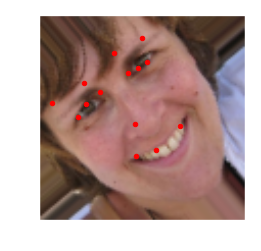

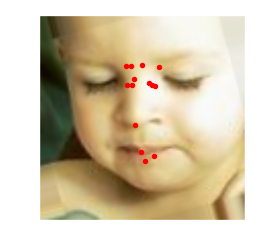

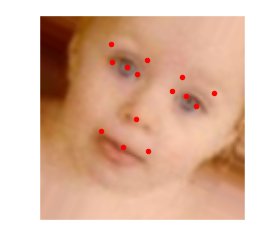

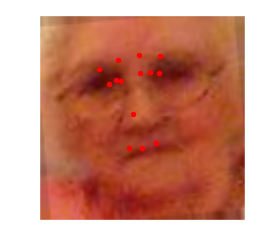

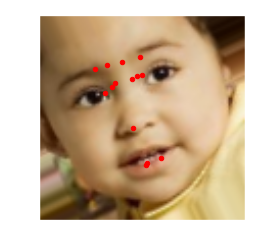

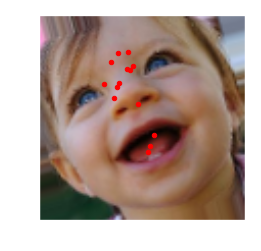

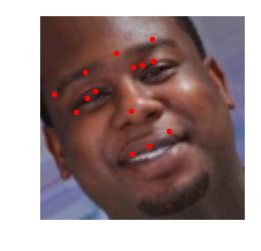

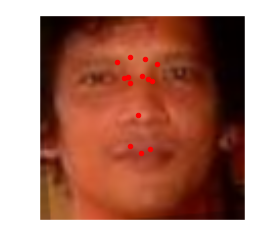

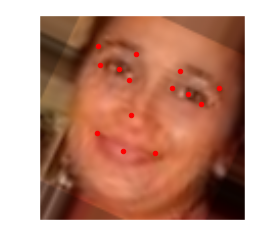

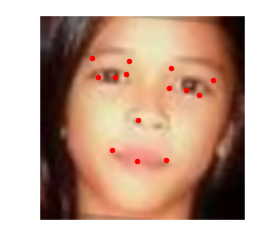

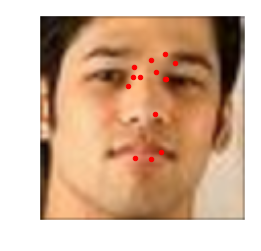

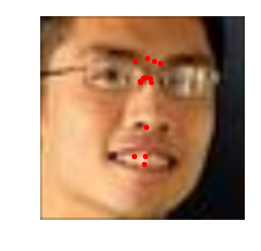

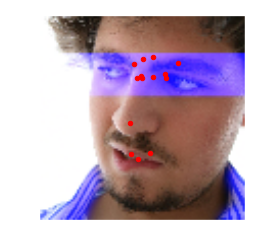

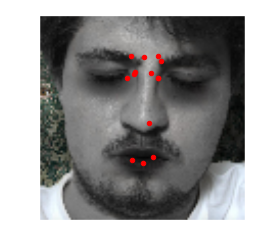

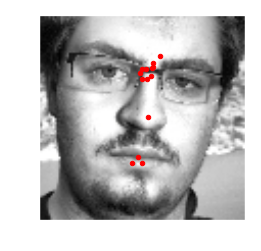

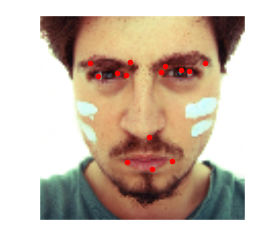

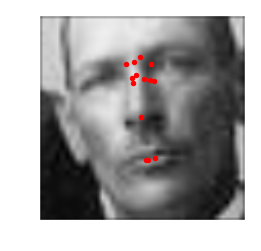

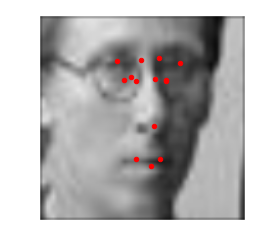

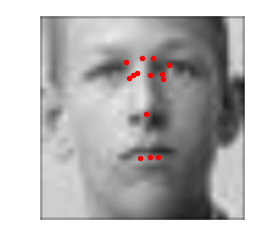

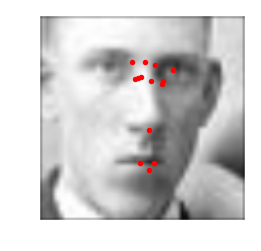

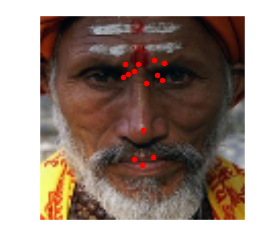

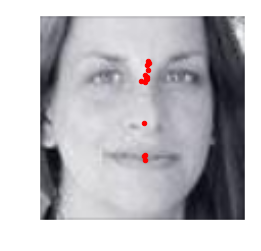

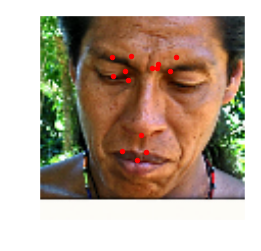

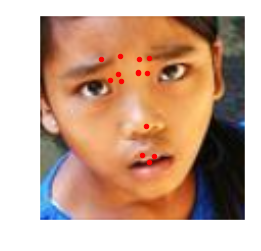

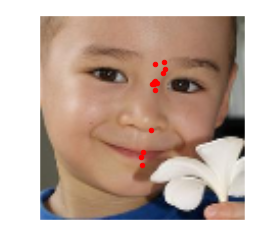

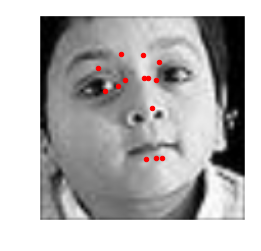

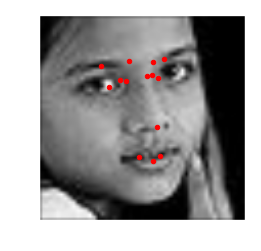

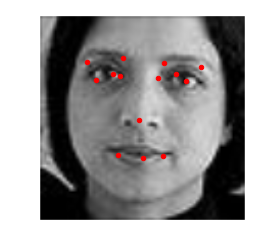

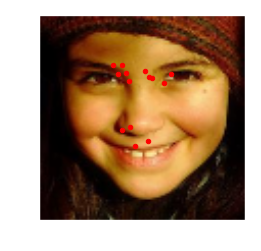

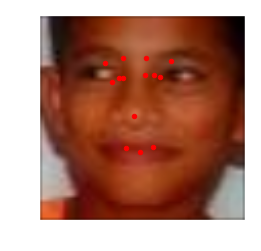

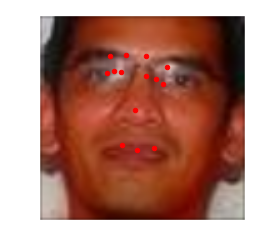

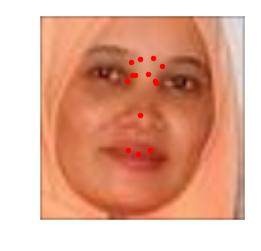

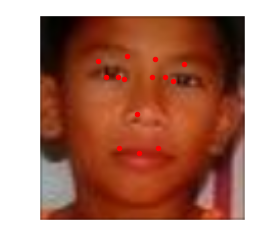

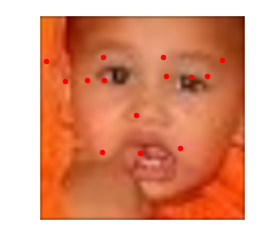

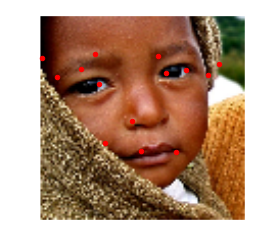

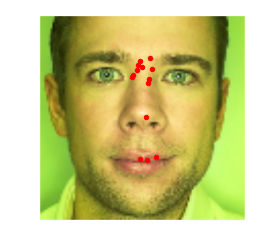

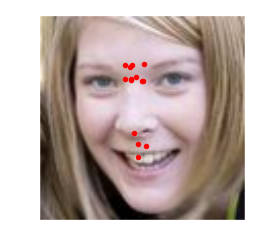

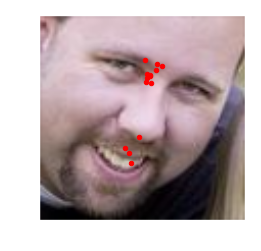

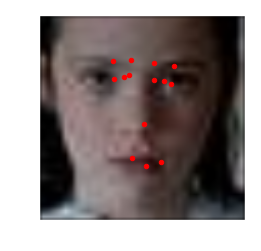

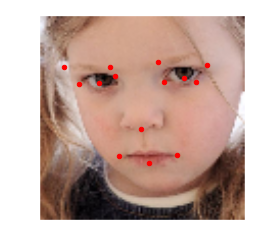

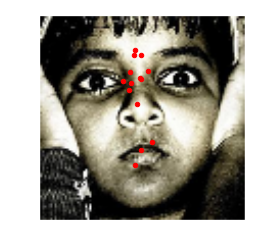

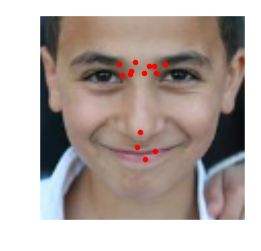

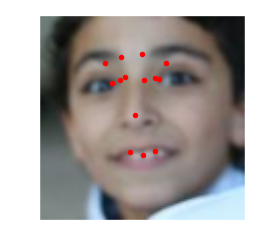

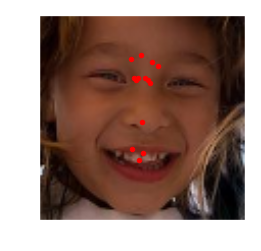

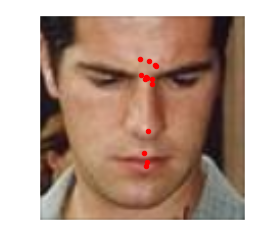

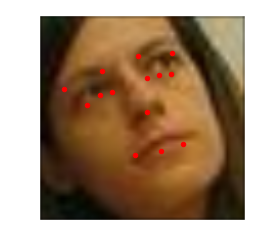

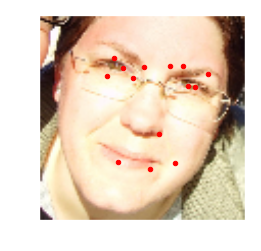

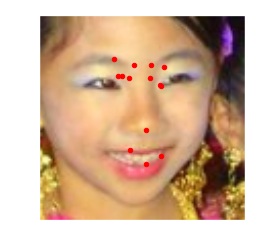

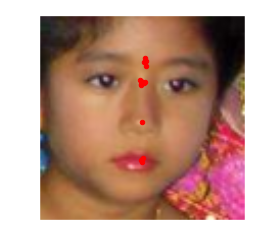

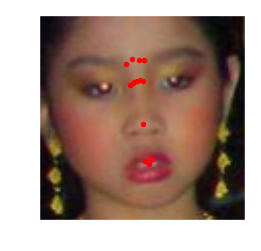

In [12]:
show_keypoints(inputs[-80:], y_pred[-80:], numb_to_show=50)